## Understanding the Dataset

With the exception of **Time/Transaction** and **Amount**, the remaining features are anonymized for privacy and have already been **scaled/standardized**. This limits how much we can rely on real-world "business logic" during EDA and changes what we should (and shouldn't) conclude from inspection.

### Implications for EDA
Because the features are not interpretable, some common checks become harder or only patrially possible:

- **Missingness assumptions (MCAR/MAR/MNAR):** We can detect whether values are missing, but we cannot easily justify *why* they are missing based on feature meaning.
- **Categorical encoding checks:** Since features are anonymized and already transformed, we cannot confidently identify which features were originally categorical or how they were encoded.
- **Data leakage checks via domain logic:** We can stil look for leakage statistically (e.g., unusually strong associations with the target or the time-based artifacts), but we can't validate it using real-world feature behavior.

---

## Quick Data Quality Summary

- **Transaction amounts are relatively small on average.** The mean transaction amount is approximately **$88**.
- **No missing values detected.** There are no `null` / `Nan` entries, so no imputation is required.
- **Severe class imbalance.** **Non-fraud** transactions represent about **99.83%**, while **fraud** transactions account for roughly **0.17%** of the dataset.   

### 1. Sanity check

In [2]:
import pandas as pd
from pathlib import Path

ROOT_DIR = Path.cwd().parent
SRC = ROOT_DIR / 'data' / 'creditcard.csv'

original_df = pd.read_csv(SRC)

In [3]:
original_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
original_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.175161e-15,3.384974e-16,-1.379537e-15,2.094852e-15,1.021879e-15,1.494498e-15,-5.620335e-16,1.149614e-16,-2.414189e-15,...,1.628620e-16,-3.576577e-16,2.618565e-16,4.473914e-15,5.109395e-16,1.686100e-15,-3.661401e-16,-1.227452e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
# Check for Nan value
original_df.isnull().sum().max()

np.int64(0)

In [7]:
# Check for class imbalance

df_target = original_df['Class']
df_target_plot = df_target.value_counts().to_frame()
df_target_plot['Percentage'] = round((df_target_plot['count'] / len(df_target)) * 100, 2)
print(df_target_plot)

        count  Percentage
Class                    
0      284315       99.83
1         492        0.17


**Note:** Notice how extremely imbalanced the data is! So, when splitting the data, we must use **Stratified split**

### 2. Drift check
Trying to find the pattern by the Time value. Expectation: high transaction times might indicate fraud pattern.

C:\Users\codet\AppData\Local\Temp\ipykernel_15820\3543461929.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary = df_time.groupby('time_bin')['Class'].mean() * 100


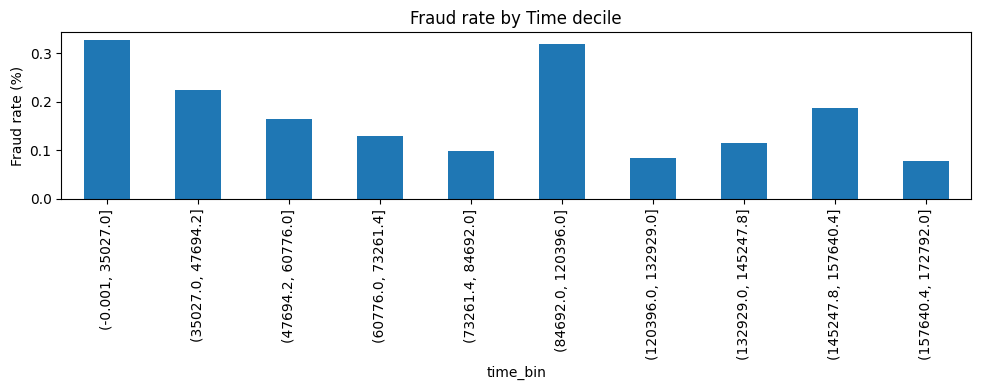

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

df_time = original_df.sort_values('Time')
df_time['time_bin'] = pd.qcut(df_time['Time'], q=10)
summary = df_time.groupby('time_bin')['Class'].mean() * 100

plt.figure(figsize=(10, 4))
summary.plot(kind='bar')
plt.ylabel("Fraud rate (%)")
plt.title("Fraud rate by Time decile")
plt.tight_layout()
plt.show()

**Conclusion:** We expected fraud rate would rise as the time grows, but by the figure, it is completely denied, and Time column alone won't tell much about the fraud pattern.

### 3. Important feature check (Time & Amount)

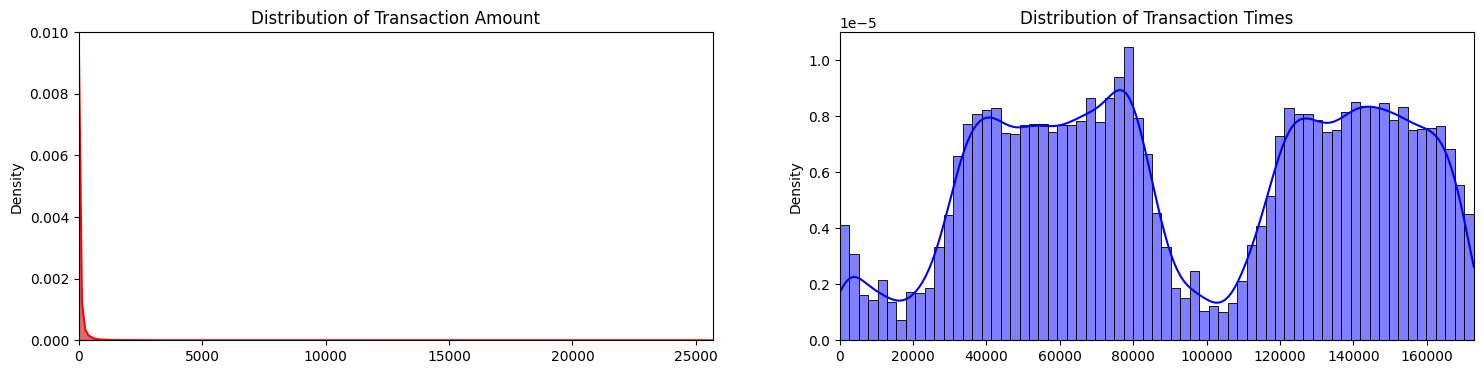

In [9]:
# Plotting distribution of Time & Amount column

import matplotlib.pyplot as plt
import seaborn as sns

amount_val = original_df['Amount'].values
time_val = original_df['Time'].values

fig, ax = plt.subplots(1, 2, figsize=(18, 4))
sns.histplot(amount_val, ax=ax[0], color='r', kde=True, stat='density')
ax[0].set_title("Distribution of Transaction Amount")
ax[0].set_ylim([0, 0.01])
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.histplot(time_val, ax=ax[1], color='b', kde=True, stat='density')
ax[1].set_title("Distribution of Transaction Times")
ax[1].set_xlim([min(time_val), max(time_val)])

plt.show()

**Note:** This distribution plots tells us that we should use RobustScaler when scaling. RobustScaler handles the dataset with extreme outliers and non-gaussion distributions

In [10]:
# Inspecting for some pattern from Amount and Time by Class

def summarize_by_cols(col):
    g = original_df.groupby('Class')[col]
    out = g.agg(['mean', 'median', 'min', 'max'])
    out['p95'] = g.quantile(0.95)
    out['p99'] = g.quantile(0.99)
    return out

print('Amount\n', summarize_by_cols('Amount'))
print('\nTime\n', summarize_by_cols('Time'))

Amount
              mean  median  min       max      p95        p99
Class                                                       
0       88.291022   22.00  0.0  25691.16  364.409  1016.9664
1      122.211321    9.25  0.0   2125.87  640.905  1357.4279

Time
                mean   median    min       max        p95        p99
Class                                                              
0      94838.202258  84711.0    0.0  172792.0  164149.30  170564.00
1      80746.806911  75568.5  406.0  170348.0  156696.25  167500.36


**Conclusion**:
- Max Amount for fraud is 2125.87, which is relatively low from non-fraud. It might suggest that large amount is not an indicator of fraud. Also, 95% of the fraud amount falls in a range of $640, which might indicate that frauds with short amount prevails.
- Time is clearly seen as a not good indicator of fraud. The minimum time of transactions for fraud is 406, which is well understood by real-life scenario.

### 4. Scaling column Time & Amount

In [11]:
from sklearn.preprocessing import RobustScaler

rob_scaler = RobustScaler()

scaled_df = original_df.copy()
scaled_df['scaled_amount'] = rob_scaler.fit_transform(scaled_df['Amount'].values.reshape(-1, 1))
scaled_df['scaled_time'] = rob_scaler.fit_transform(scaled_df['Time'].values.reshape(-1, 1))
scaled_df.drop(['Time', 'Amount'], axis=1, inplace=True)

In [12]:
# Reordering the columns
cols = scaled_df.columns.to_list()
front = ['scaled_amount', 'scaled_time']
scaled_df = scaled_df[front + [c for c in cols if c not in front]]
print(scaled_df.columns.to_list())

['scaled_amount', 'scaled_time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Class']


### 5. Correlation & Redundancy

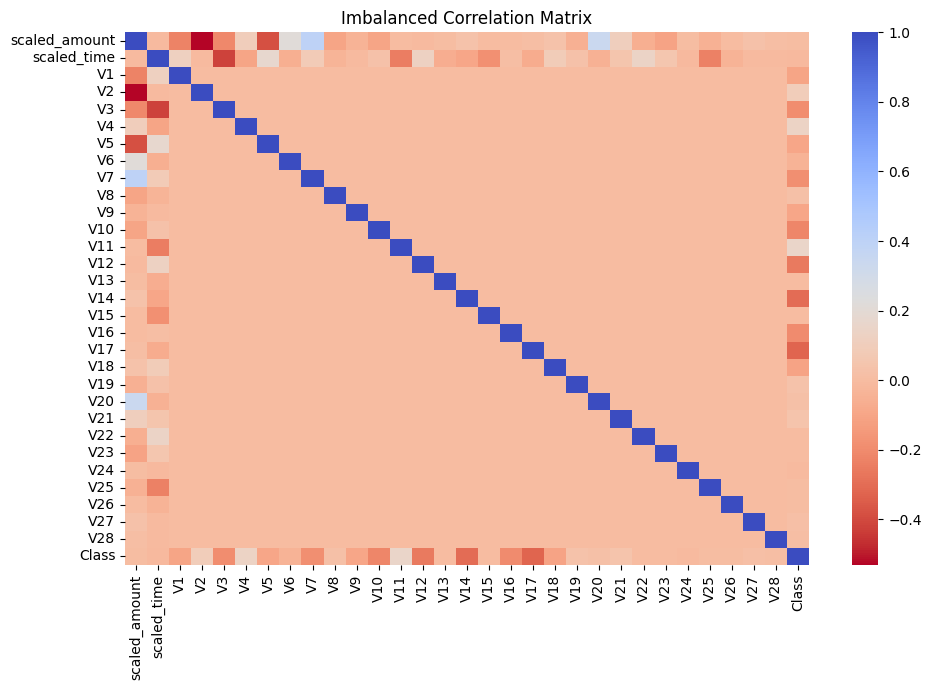

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

corr = scaled_df.corr(numeric_only=True)
plt.figure(figsize=(10, 7))
sns.heatmap(corr, cmap='coolwarm_r')
plt.title('Imbalanced Correlation Matrix')
plt.tight_layout()
plt.show()

In [14]:
# Check if two features are 95% correlated, if so drop the column
from __future__ import annotations
import numpy as np
import pandas as pd

def drop_highly_correlated_keep_target(
    df: pd.DataFrame,
    target_col: str,
    threshold: float = 0.95,
    method: str = 'pearson'
):
    """
    Drops one of any two features whose absolute correlation >= threshold,
    keeping the feature that is MORE correlated with the target (absolute).

    Returns:
        df_reduced: DataFrame with redundant columns removed
        dropped: list of dropped column names
        decisions: DataFrame log of (kept, dropped, feature_corr, kept_target_corr, dropped_target_corr)
    """
    if target_col not in df.columns:
        raise ValueError(f"target_col '{target_col}' not found in df.columns")
    
    # Use only numeric columns for correlation
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    if target_col not in numeric_cols:
        raise ValueError(
            f"target_col '{target_col}' must be numeric (e.g., 0/1). "
            "If it's categorical, map it to numbers first."
        )
    
    feature_cols = [c for c in numeric_cols if c != target_col]
    if len(feature_cols) < 2:
        return df.copy(), [], pd.DataFrame(columns=[
            'kept', 'dropped', 'abs_feature_corr', 'kept_abs_target_corr', 'dropped_abs_target_corr'
        ])

    # Correlation among features
    corr = df[feature_cols].corr(method=method).abs()

    # Correlation of each feature with the target
    target_cor = df[feature_cols + [target_col]].corr(method=method)[target_col].abs()
    target_cor = target_cor.drop(index=target_col).fillna(0.0)

    # Get upper triangle pairs (avoid duplicates and self-correlation)
    upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
    pairs = (
        upper.stack()
        .reset_index()
        .rename(columns={'level_0': 'f1', 'level_1': 'f2', 0: 'abs_feature_corr'})
        .sort_values('abs_feature_corr', ascending=False)
    )

    dropped = set()
    decisions = []

    for f1, f2, cval in pairs.itertuples(index=False):
        if cval < threshold:
            break
        if f1 in dropped or f2 in dropped:
            continue
        
        t1 = float(target_cor.get(f1, 0.0))
        t2 = float(target_cor.get(f2, 0.0))

        # Drop the one LESS related to the target
        if t1 > t2:
            keep, drop = f1, f2
        elif t1 < t2:
            keep, drop = f2, f1
        else:
            # Tie-breaker: drop f2 (deterministic)
            keep, drop = f1, f2

        dropped.add(drop)
        decisions.append({
            "kept": keep,
            "dropped": drop,
            "abs_feature_corr": float(cval),
            "kept_abs_target_corr": float(max(t1, t2)),
            "dropped_abs_target_corr": float(min(t1, t2)),
        })

    df_reduced = df.drop(columns=list(dropped), errors='ignore')
    decisions_df = pd.DataFrame(decisions)

    return df_reduced, sorted(dropped), decisions_df

df_reduced, dropped_cols, log = drop_highly_correlated_keep_target(original_df, target_col='Class', threshold=0.95)
print("Dropped:", dropped_cols)
display(log.head(10))

Dropped: []


""


In [15]:
# Correlation of features with the target by number
corr_with_class = scaled_df.corr(numeric_only = True)['Class'].drop('Class').sort_values()
print('Most negative:\n', corr_with_class.head(5))
print('\nMost positive: \n', corr_with_class.tail(5))

Most negative:
 V17   -0.326481
V14   -0.302544
V12   -0.260593
V10   -0.216883
V16   -0.196539
Name: Class, dtype: float64

Most positive: 
 V19    0.034783
V21    0.040413
V2     0.091289
V4     0.133447
V11    0.154876
Name: Class, dtype: float64


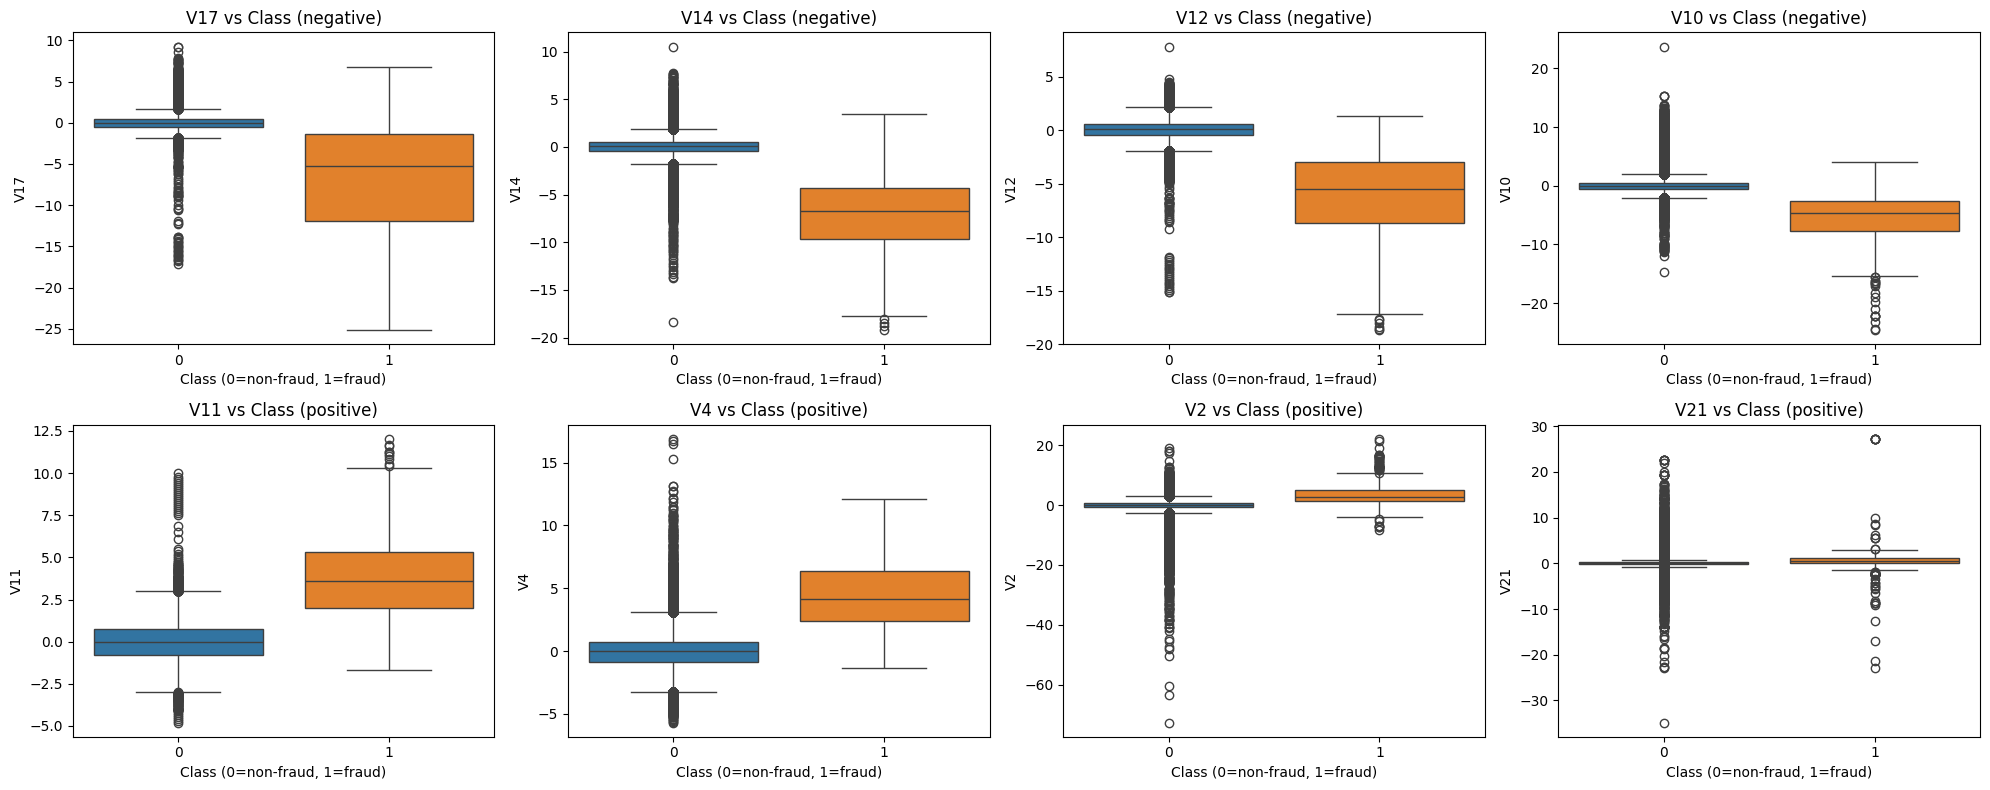

In [16]:
# Plotting box plot to see the features against class

import matplotlib.pyplot as plt
import seaborn as sns

MOST_NEGATIVE = ['V17', 'V14', 'V12', 'V10']
MOST_POSITIVE = ['V11', 'V4', 'V2', 'V21']

colors = {0: "#1f77b4", 1: "#ff7f0e"}  # blue, orange

def plot_class_boxplots(df, neg_features, pos_features, palette=colors):
    """
    Draws boxplots of each feature vs Class (0/1) with seaborn.
    Top row: neg_features
    Bottom row: pos_features
    """

    if 'Class' not in df.columns:
        raise ValueError('DataFrame must contain a Class column')
    
    # Ensure Class is clean ints (helps palette mapping)
    df = df.copy()
    df['Class'] = df['Class'].astype(int)

    # Keep only existing features
    neg = [c for c in neg_features if c in df.columns]
    pos = [c for c in pos_features if c in df.columns]

    missing_feats = [c for c in (neg_features + pos_features) if c not in df.columns]
    if missing_feats:
        print(f"warning: skipping missing features: {missing_feats}")

    ncols = max(len(neg), len(pos))
    fig, axes = plt.subplots(nrows=2, ncols=ncols, figsize=(5 * ncols, 8), squeeze=False)

    def _box(ax, feat, title):
        sns.boxplot(
            data=df,
            x='Class',
            y=feat,
            hue='Class',
            palette=palette,
            ax=ax
        )
        # Remove redundant legend (same as x-axis)
        if ax.get_legend() is not None:
            ax.get_legend().remove()

        ax.set_title(title)
        ax.set_xlabel("Class (0=non-fraud, 1=fraud)")

    # Row 1: negative
    for i in range(ncols):
        ax = axes[0, i]
        if i < len(neg):
            feat = neg[i]
            _box(ax, feat, f"{feat} vs Class (negative)")
        else:
            ax.axis('off')

    for i in range(ncols):
        ax = axes[1, i]
        if i < len(pos):
            feat = pos[i]
            _box(ax, feat, f'{feat} vs Class (positive)')
        else:
            ax.axis('off')

    plt.tight_layout()
    plt.show()

plot_class_boxplots(scaled_df, MOST_NEGATIVE, MOST_POSITIVE)

**Important Conclusion:**
As the plots show, all key features exhibit outliers even though the sample is non‑fraud. This suggests that unsupervised anomaly detection is unreliable here, since these methods depend on outliers, clusters, or density to flag anomalies. As a result, unsupervised approaches like DBSCAN, Isolation Forest, Autoencoders are likely to underperform compared with supervised models such as XGBoost and LightGBM.

### 6. TSNE, PCA, TruncatedSVD

**Note:** In a professional settings, the figures created by dimensionality reduction technique aren't informative enough. It only tells if the model can learn something from the data.

In [17]:
# Random Under Sampling for the figures

import pandas as pd

fraud_df = scaled_df[scaled_df['Class'] == 1]
non_fraud_df = scaled_df[scaled_df['Class'] == 0].sample(n=len(fraud_df), random_state=42)

sampled_df = pd.concat([fraud_df, non_fraud_df], axis=0).sample(frac=1, random_state=42).reset_index(drop=True)

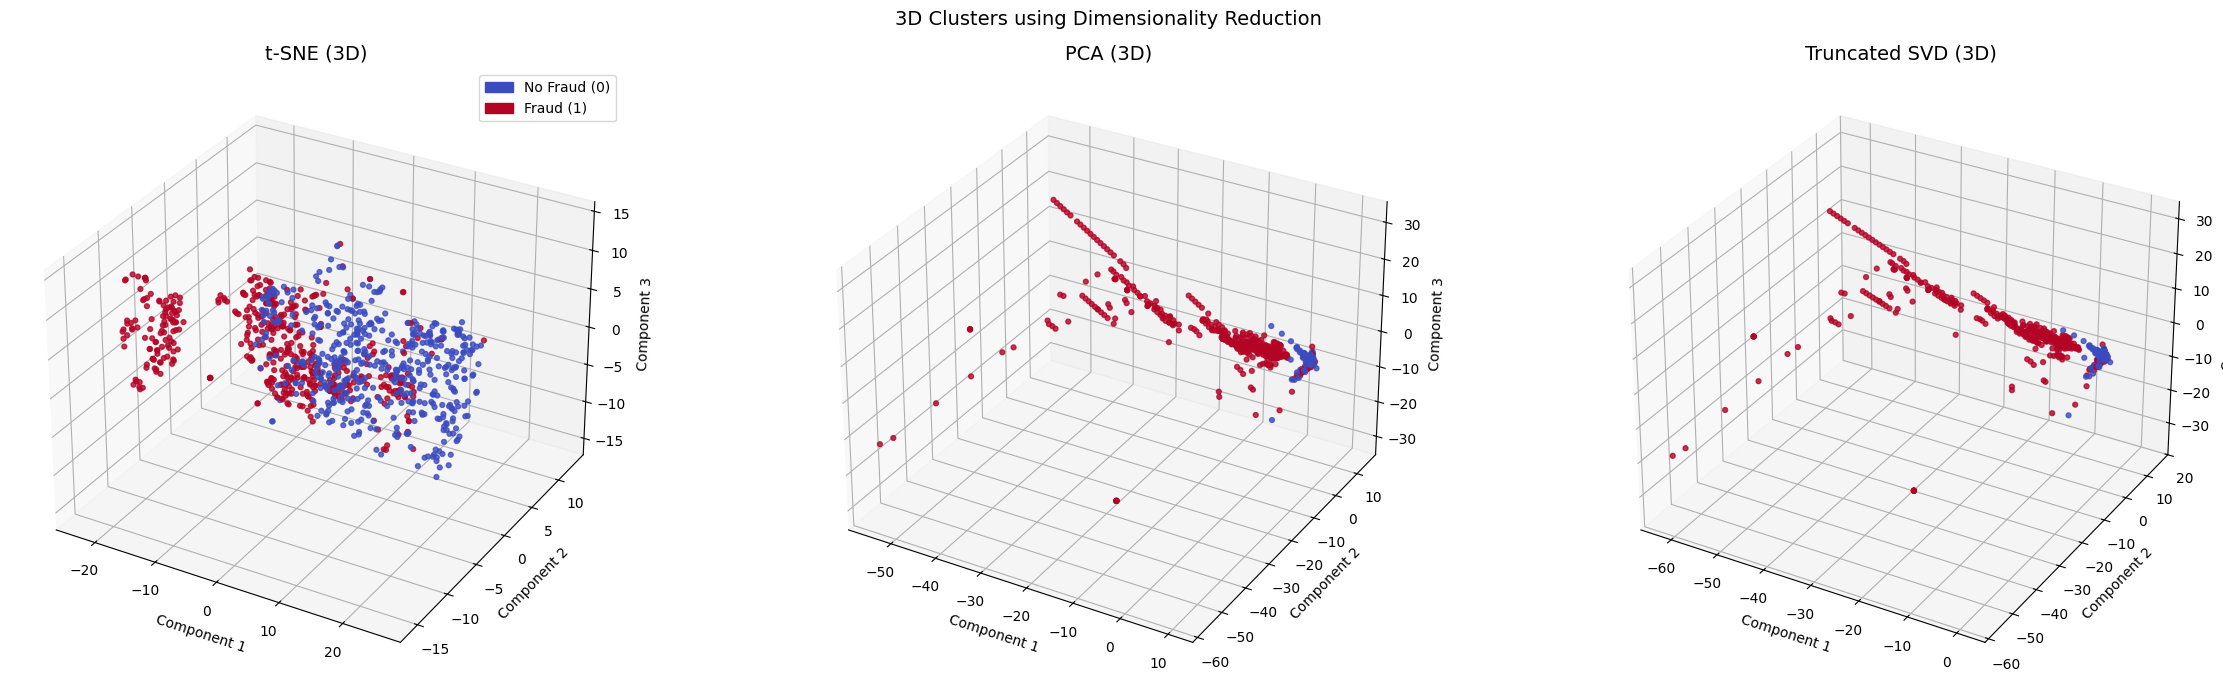

In [18]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD

X = sampled_df.drop('Class', axis=1).values
y = sampled_df['Class'].astype(int).values

# 3D Dimensionality reduction
X_tsne_3d = TSNE(
    n_components=3,
    random_state=42,
    init='pca',
    learning_rate='auto',
    perplexity=30,
).fit_transform(X)

X_pca_3d = PCA(n_components=3, svd_solver='randomized', random_state=42).fit_transform(X)

X_svd_3d = TruncatedSVD(n_components=3, algorithm='randomized', random_state=42).fit_transform(X)

#Plotting
fig = plt.figure(figsize=(24, 7))
fig.suptitle("3D Clusters using Dimensionality Reduction", fontsize=14)

ax1 = fig.add_subplot(1, 3, 1, projection='3d')
ax2 = fig.add_subplot(1, 3, 2, projection='3d')
ax3 = fig.add_subplot(1, 3, 3, projection='3d')

def plot3d(ax, X3d, y, title):
    ax.scatter(
        X3d[:, 0], X3d[:, 1], X3d[:, 2],
        c=y, cmap='coolwarm', s=12, alpha=0.8
    )
    ax.set_title(title, fontsize=14)
    ax.set_xlabel('Component 1')
    ax.set_ylabel('Component 2')
    ax.set_zlabel('Component 3')
    ax.grid(True)

plot3d(ax1, X_tsne_3d, y, 't-SNE (3D)')
plot3d(ax2, X_pca_3d, y, 'PCA (3D)')
plot3d(ax3, X_svd_3d, y, 'Truncated SVD (3D)')

# Simple legend matching the colormap endpoints
no_fraud_color = plt.cm.coolwarm(0.0)
fraud_color = plt.cm.coolwarm(1.0)
legend_handles = [
    Patch(color=no_fraud_color, label='No Fraud (0)'),
    Patch(color=fraud_color, label='Fraud (1)')
]
ax1.legend(handles=legend_handles, loc='best')

plt.tight_layout()
plt.show()

### 7. Feature Level seperation ranking

In [20]:
import pandas as pd
from sklearn.metrics import average_precision_score

y = scaled_df["Class"].astype(int)
features = [c for c in scaled_df.columns if c != "Class"]

rows = []
for c in features:
    ap = average_precision_score(y, scaled_df[c])

    # Optional: if feature is inversely related, allow flipping
    ap_flipped = average_precision_score(y, -scaled_df[c])
    strength = max(ap, ap_flipped)
    direction = "normal" if ap >= ap_flipped else "flipped"

    rows.append((c, ap, ap_flipped, strength, direction))

ap_df = (
    pd.DataFrame(rows, columns=["feature", "avg_precision", "avg_precision_flipped", "strength", "direction"])
      .sort_values("strength", ascending=False)
)

print(ap_df.head(5))
print(ap_df.tail(5))

   feature  avg_precision  avg_precision_flipped  strength direction
15     V14       0.000882               0.617233  0.617233   flipped
18     V17       0.005514               0.615490  0.615490   flipped
13     V12       0.000878               0.579698  0.579698   flipped
11     V10       0.000900               0.560254  0.560254   flipped
12     V11       0.494598               0.000887  0.494598    normal
        feature  avg_precision  avg_precision_flipped  strength direction
26          V25       0.003425               0.002557  0.003425    normal
1   scaled_time       0.001395               0.002466  0.002466   flipped
14          V13       0.001697               0.002155  0.002155   flipped
25          V24       0.001397               0.001961  0.001961   flipped
27          V26       0.001940               0.001569  0.001940    normal


### 8. Feature stability across splits

In [22]:
import pandas as pd

from sklearn.model_selection import StratifiedKFold
from sklearn.inspection import permutation_importance
from sklearn.metrics import average_precision_score

from xgboost import XGBClassifier

X = scaled_df.drop(columns=['Class'])
y = scaled_df['Class'].astype(int)

def ap_scorer(estimator, X, y):
    # Average Precision (PR-AUC) using predicted probabilities for class 1
    proba = estimator.predict_proba(X)[:, 1]
    return average_precision_score(y, proba)

def make_xgb(scale_pos_weight: float) -> XGBClassifier:
    return XGBClassifier(
        n_estimators=800,
        learning_rate=0.05,
        max_depth=4,
        subsample=0.8,
        colsample_bytree=0.8,
        reg_lambda=1.0,
        min_child_weight=1.0,
        gamma=0.0,
        scale_pos_weight=scale_pos_weight,
        tree_method='hist',
        n_jobs=-1,
        random_state=42,
        eval_metric='aucpr',
        verbosity=0,
    )


skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

fold_importances = []
fold_scores = []

for fold, (tr_idx, va_idx) in enumerate(skf.split(X, y), start=1):
    X_tr, X_va = X.iloc[tr_idx], X.iloc[va_idx]
    y_tr, y_va = y.iloc[tr_idx], y.iloc[va_idx]

    n_pos = int(y_tr.sum())
    n_neg = int((y_tr == 0).sum())
    spw = n_neg / max(n_pos, 1)

    model = make_xgb(spw)
    model.fit(X_tr, y_tr)

    # PR_AUC on this fold's validation set
    proba_va = model.predict_proba(X_va)[:, 1]
    pr_auc = average_precision_score(y_va, proba_va)
    fold_scores.append(pr_auc)

    # Permutation importance (PR-AUC drop when feature is shuffled)
    pi = permutation_importance(
        model,
        X_va, y_va,
        scoring=ap_scorer,
        n_repeats=5,
        random_state=fold,
        n_jobs=-1
    )

    imp = pd.Series(pi.importances_mean, index=X.columns, name=f'fold_{fold}')
    fold_importances.append(imp)


imp_df = pd.concat(fold_importances, axis=1)

summary = pd.DataFrame({
    'mean_importance': imp_df.mean(axis=1),
    'std_importance': imp_df.std(axis=1),
})
summary['cv'] = summary['std_importance'] / (summary['mean_importance'].abs() + 1e-12)
summary = summary.sort_values('mean_importance', ascending=False)

In [23]:
print("\nPR-AUC across folds:", [round(s, 5) for s in fold_scores])
print("\nTop 5 important features (mean permutation importance):")
print(summary.head(5))
print("\nLeast 5 important features (mean permutation importance):")
print(summary.tail(5))
print("\nMost unstable among the top 30 (higher cv = more unstable):")
print(summary.head(30).sort_values('cv', ascending=False).head(5))


PR-AUC across folds: [0.8533, 0.89629, 0.88084, 0.85934, 0.82679]

Top 5 important features (mean permutation importance):
               mean_importance  std_importance        cv
V14                   0.074438        0.031577  0.424210
V4                    0.050095        0.009463  0.188902
V12                   0.031596        0.010460  0.331064
V3                    0.012247        0.004686  0.382621
scaled_amount         0.010653        0.002300  0.215927

Least 5 important features (mean permutation importance):
     mean_importance  std_importance         cv
V17         0.000393        0.003515   8.946005
V16         0.000366        0.002967   8.111669
V27        -0.000054        0.002540  46.897245
V13        -0.000352        0.002256   6.413777
V9         -0.000600        0.002397   3.996432

Most unstable among the top 30 (higher cv = more unstable):
     mean_importance  std_importance         cv
V27        -0.000054        0.002540  46.897245
V17         0.000393        0.

### 9. Base model with train/val/test split

In [24]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    average_precision_score,
    roc_auc_score,
    confusion_matrix,
    classification_report,
)

from xgboost import XGBClassifier


def make_splits(df, *, test_size=0.2, val_size=0.2, random_state=42, val_is_total=False):
    df = df.copy()
    df["Class"] = df["Class"].astype(int)

    X = df.drop(columns=["Class"])
    y = df["Class"]

    X_trainval, X_test, y_trainval, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state, stratify=y
    )

    # If you want val_size to mean "fraction of TOTAL dataset"
    if val_is_total:
        val_size = val_size / (1 - test_size)

    X_train, X_val, y_train, y_val = train_test_split(
        X_trainval,
        y_trainval,
        test_size=val_size,
        random_state=random_state,
        stratify=y_trainval,
    )
    return X_train, X_val, X_test, y_train, y_val, y_test


X_train, X_val, X_test, y_train, y_val, y_test = make_splits(scaled_df, val_is_total=False)

n_pos = int(y_train.sum())
n_neg = int((y_train == 0).sum())
scale_pos_weight = n_neg / max(n_pos, 1)

xgb = XGBClassifier(
    n_estimators=5000,
    learning_rate=0.03,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_lambda=1.0,
    min_child_weight=1.0,
    gamma=0.0,
    scale_pos_weight=scale_pos_weight,
    eval_metric="aucpr",
    tree_method="hist",
    n_jobs=-1,
    random_state=42,
    early_stopping_rounds=200,
)

xgb.fit(
    X_train,
    y_train,
    eval_set=[(X_val, y_val)],
    verbose=200,
)

[0]	validation_0-aucpr:0.12040
[200]	validation_0-aucpr:0.72823
[400]	validation_0-aucpr:0.80193
[600]	validation_0-aucpr:0.81953
[800]	validation_0-aucpr:0.82765
[1000]	validation_0-aucpr:0.83644
[1200]	validation_0-aucpr:0.84177
[1400]	validation_0-aucpr:0.84345
[1600]	validation_0-aucpr:0.84435
[1800]	validation_0-aucpr:0.84493
[2000]	validation_0-aucpr:0.84531
[2200]	validation_0-aucpr:0.84580
[2400]	validation_0-aucpr:0.84598
[2600]	validation_0-aucpr:0.84591
[2800]	validation_0-aucpr:0.84608
[2939]	validation_0-aucpr:0.84590


,"objective objective: typing.Union[str, xgboost.sklearn._SklObjWProto, typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]], NoneType]Specify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'binary:logistic'
,"base_score base_score: typing.Union[float, typing.List[float], NoneType]The initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.Optional[typing.List[xgboost.callback.TrainingCallback]]List of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: typing.Optional[float]Subsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: typing.Optional[float]Subsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: typing.Optional[float]Subsample ratio of columns when constructing each tree.,0.8
,"device device: typing.Optional[str].. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: typing.Optional[int].. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",200
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: typing.Union[str, typing.List[typing.Union[str, typing.Callable]], typing.Callable, NoneType].. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes fr

In [25]:
def evaluate(model, X, y, *, threshold=0.5, name="Eval"):
    proba = model.predict_proba(X)[:, 1]

    pr_auc = average_precision_score(y, proba)
    roc_auc = roc_auc_score(y, proba)

    pred = (proba >= threshold).astype(int)
    cm = confusion_matrix(y, pred)

    print(f"\n{name}")
    print(f"PR-AUC  : {pr_auc:.6f}")
    print(f"ROC-AUC : {roc_auc:.6f}")
    print(f"Threshold: {threshold}")
    print("Confusion matrix:\n", cm)
    print(classification_report(y, pred, digits=4))

    return proba


proba_val = evaluate(xgb, X_val, y_val, threshold=0.5, name="XGB (Val)")
proba_test = evaluate(xgb, X_test, y_test, threshold=0.5, name="XGB (Test)")


XGB (Val)
PR-AUC  : 0.846655
ROC-AUC : 0.973518
Threshold: 0.5
Confusion matrix:
 [[45484     6]
 [   16    63]]
              precision    recall  f1-score   support

           0     0.9996    0.9999    0.9998     45490
           1     0.9130    0.7975    0.8514        79

    accuracy                         0.9995     45569
   macro avg     0.9563    0.8987    0.9256     45569
weighted avg     0.9995    0.9995    0.9995     45569


XGB (Test)
PR-AUC  : 0.873509
ROC-AUC : 0.980676
Threshold: 0.5
Confusion matrix:
 [[56854    10]
 [   15    83]]
              precision    recall  f1-score   support

           0     0.9997    0.9998    0.9998     56864
           1     0.8925    0.8469    0.8691        98

    accuracy                         0.9996     56962
   macro avg     0.9461    0.9234    0.9344     56962
weighted avg     0.9996    0.9996    0.9996     56962



In [26]:
imp = pd.Series(xgb.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print("\nTop 5 features")
print(imp.head(5))
print("\nLeast 5 features")
print(imp.tail(5))


Top 5 features
V14    0.451243
V10    0.144648
V4     0.072342
V8     0.035459
V12    0.032428
dtype: float32

Least 5 features
V25            0.004651
scaled_time    0.004200
V15            0.003984
V23            0.003595
V27            0.003571
dtype: float32


### 10. Picking Thresholds

In [27]:
import numpy as np
from sklearn.metrics import precision_recall_curve, average_precision_score, roc_auc_score, confusion_matrix, classification_report

def pick_treshold_max_f1(y_true, proba):
    precision, recall, thresholds = precision_recall_curve(y_true, proba)
    # precision/recall have length = len(thresholds) + 1, it is default.
    f1 = 2 * (precision[:-1] * recall[:-1]) / (precision[:-1] + recall[:-1] + 1e-12)
    best_idx = np.argmax(f1)
    return thresholds[best_idx], precision[best_idx], recall[best_idx], f1[best_idx]

def evaluate_at_threshold(y_true, proba, threshold, name='Eval'):
    preds = (proba>=threshold).astype(int)
    
    print(f"{name}")
    print(f"Treshold: {threshold:.5f}")
    print("Confusion matrix:\n", confusion_matrix(y_true, preds))
    print(classification_report(y_true, preds, digits=4))

# Get probabilities
proba_val  = xgb.predict_proba(X_val)[:, 1]
proba_test = xgb.predict_proba(X_test)[:, 1]

# Choose threshold on validation (best F1)
thr, p, r, f1 = pick_treshold_max_f1(y_val.values if hasattr(y_val, "values") else y_val, proba_val)

# Evaluate on test using that threshold
evaluate_at_threshold(y_test.values if hasattr(y_test, "values") else y_test, proba_test, thr, name="TEST @ val-chosen threshold")

TEST @ val-chosen threshold
Treshold: 0.96835
Confusion matrix:
 [[56859     5]
 [   19    79]]
              precision    recall  f1-score   support

           0     0.9997    0.9999    0.9998     56864
           1     0.9405    0.8061    0.8681        98

    accuracy                         0.9996     56962
   macro avg     0.9701    0.9030    0.9340     56962
weighted avg     0.9996    0.9996    0.9996     56962



In [28]:
def pick_threshold_recall_at_min_precision(y_true, proba, min_precision=0.10):
    precision, recall, thresholds = precision_recall_curve(y_true, proba)
    precision_t = precision[:-1]
    recall_t = recall[:-1]

    ok = precision_t >= min_precision
    if not np.any(ok):
        # no threshold reaches min precision
        best_idx = np.argmax(precision_t)
        return thresholds[best_idx], precision_t[best_idx], recall_t[best_idx]
    
    # among acceptable thresholds, pick highest recall
    idx = np.argmax(recall_t[ok])
    best_idx = np.where(ok)[0][idx]
    return thresholds[best_idx], precision_t[best_idx], recall_t[best_idx]

thr2, p2, r2 = pick_threshold_recall_at_min_precision(y_val, proba_val, min_precision=0.10)

evaluate_at_threshold(y_test, proba_test, thr2, name="TEST @ precision-constrained threshold")

TEST @ precision-constrained threshold
Treshold: 0.00012
Confusion matrix:
 [[56025   839]
 [   10    88]]
              precision    recall  f1-score   support

           0     0.9998    0.9852    0.9925     56864
           1     0.0949    0.8980    0.1717        98

    accuracy                         0.9851     56962
   macro avg     0.5474    0.9416    0.5821     56962
weighted avg     0.9983    0.9851    0.9911     56962



### 11. Calibration Curve

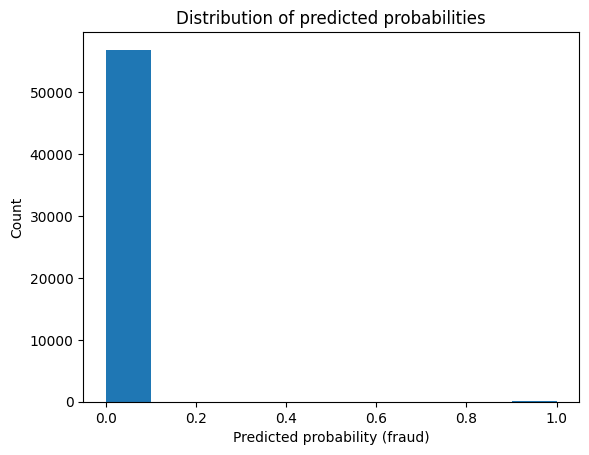

Min/Max: 5.8011504e-12 1.0
Mean predicted: 0.0016673531
Base rate: 0.0017204452090867595


In [29]:
import matplotlib.pyplot as plt
plt.hist(proba_test, bins=10)
plt.title("Distribution of predicted probabilities")
plt.xlabel("Predicted probability (fraud)")
plt.ylabel("Count")
plt.show()

print("Min/Max:", proba_test.min(), proba_test.max())
print("Mean predicted:", proba_test.mean())
print("Base rate:", y_test.mean())

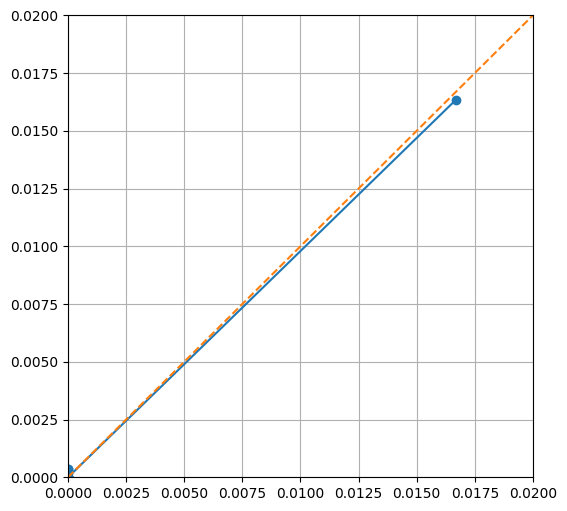

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.calibration import calibration_curve

# proba_test = xgb.predict_proba(X_test)[:, 1]
y_true = y_test.values if hasattr(y_test, "values") else y_test

frac_pos, mean_pred = calibration_curve(y_true, proba_test, n_bins=10, strategy="quantile")

plt.figure(figsize=(6,6))
plt.plot(mean_pred, frac_pos, marker="o")
plt.plot([0,1], [0,1], "--")
plt.xlim(0, 0.02)   # adjust based on your max proba
plt.ylim(0, 0.02)
plt.grid(True)
plt.show()

In [31]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.frozen import FrozenEstimator  # sklearn >= 1.6+
from sklearn.metrics import brier_score_loss

# xgb must already be fitted before this line (you did xgb.fit(...))

cal = CalibratedClassifierCV(
    estimator=FrozenEstimator(xgb),  # tells sklearn: "don't refit the model"
    method="sigmoid"                 # Platt scaling (good default)
)
cal.fit(X_val, y_val)                # uses ALL val data to learn calibration mapping

# Compare raw vs calibrated probabilities on test
proba_test_raw = xgb.predict_proba(X_test)[:, 1]
proba_test_cal = cal.predict_proba(X_test)[:, 1]

print("Brier raw:", brier_score_loss(y_test, proba_test_raw))
print("Brier cal:", brier_score_loss(y_test, proba_test_cal))

Brier raw: 0.00041520543163642287
Brier cal: 0.0003881933109463978


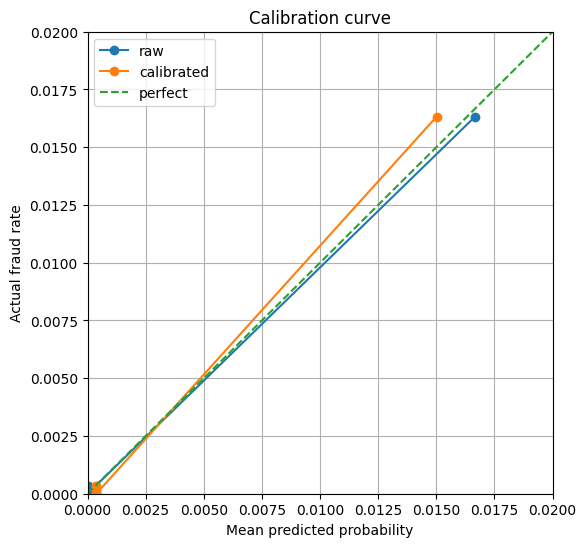

In [32]:
import matplotlib.pyplot as plt
from sklearn.calibration import calibration_curve

y_true = y_test.values if hasattr(y_test, "values") else y_test

frac_pos_raw, mean_pred_raw = calibration_curve(y_true, proba_test_raw, n_bins=10, strategy="quantile")
frac_pos_cal, mean_pred_cal = calibration_curve(y_true, proba_test_cal, n_bins=10, strategy="quantile")

plt.figure(figsize=(6,6))
plt.plot(mean_pred_raw, frac_pos_raw, marker="o", label="raw")
plt.plot(mean_pred_cal, frac_pos_cal, marker="o", label="calibrated")
plt.plot([0,1], [0,1], "--", label="perfect")
plt.xlabel("Mean predicted probability")
plt.ylabel("Actual fraud rate")
plt.title("Calibration curve")
plt.ylim(0, 0.02)
plt.xlim(0, 0.02)
plt.grid(True)
plt.legend()
plt.show()

### 12. Top-K evaluation/alert-volume metrics

In [33]:
import numpy as np
import pandas as pd

def topk_metrics(y_true, proba, ks):
    y_true = np.asarray(y_true)
    proba = np.asarray(proba)

    order = np.argsort(-proba)
    y_sorted = y_true[order]
    total_fraud = y_sorted.sum()

    rows = []
    cum_tp = np.cumsum(y_sorted) # how many frauds caught up to rank k

    for k in ks:
        k = int(min(k, len(y_sorted)))
        tp = cum_tp[k-1]
        fp = k - tp
        precision = tp / max(k, 1)
        recall = tp / max(total_fraud, 1)
        rows.append((k, int(tp), int(fp), precision, recall))

    return pd.DataFrame(rows, columns = ['alerts_k', 'tp', 'fp', 'precision', 'recall'])

df_curve = topk_metrics(y_val, proba_val, ks=[50, 100, 200, 500, 1000, 2000])
print(df_curve)

   alerts_k  tp    fp  precision    recall
0        50  50     0      1.000  0.632911
1       100  66    34      0.660  0.835443
2       200  69   131      0.345  0.873418
3       500  71   429      0.142  0.898734
4      1000  71   929      0.071  0.898734
5      2000  72  1928      0.036  0.911392


### 13. Error analysis (after a baseline)

In [34]:
import pandas as pd

threshold = thr
test_df = X_test.copy()
test_df["y_true"] = y_test.values if hasattr(y_test, "values") else y_test
test_df["proba"] = proba_test
test_df["y_pred"] = (test_df["proba"] >= threshold).astype(int)

# make 10 amount bins
test_df["amount_bin"] = pd.qcut(test_df["scaled_amount"], q=10, duplicates="drop")

summary = (
    test_df.groupby("amount_bin", observed=True)
    .apply(
        lambda g: pd.Series({
            "n": len(g),
            "fraud_rate": g["y_true"].mean(),
            "precision": (((g["y_pred"]==1) & (g["y_true"]==1)).sum()
                          / max((g["y_pred"]==1).sum(), 1)),
            "recall": (((g["y_pred"]==1) & (g["y_true"]==1)).sum()
                       / max((g["y_true"]==1).sum(), 1)),
            "fp": ((g["y_pred"]==1) & (g["y_true"]==0)).sum(),
            "fn": ((g["y_pred"]==0) & (g["y_true"]==1)).sum(),
        }),
        include_groups=False
    )
    .reset_index()
)


print(summary)

         amount_bin       n  fraud_rate  precision    recall   fp   fn
0  (-0.308, -0.293]  6172.0    0.005833   0.882353  0.833333  4.0  6.0
1  (-0.293, -0.258]  5223.0    0.001340   1.000000  0.571429  0.0  3.0
2  (-0.258, -0.184]  5694.0    0.000878   1.000000  0.600000  0.0  2.0
3  (-0.184, -0.126]  5735.0    0.000697   1.000000  0.750000  0.0  1.0
4     (-0.126, 0.0]  5711.0    0.000175   1.000000  1.000000  0.0  0.0
5      (0.0, 0.209]  5644.0    0.000886   1.000000  0.600000  0.0  2.0
6     (0.209, 0.52]  5694.0    0.000527   1.000000  1.000000  0.0  0.0
7      (0.52, 1.09]  5708.0    0.002278   1.000000  0.846154  0.0  2.0
8     (1.09, 2.495]  5685.0    0.001407   1.000000  1.000000  0.0  0.0
9  (2.495, 180.101]  5696.0    0.002809   0.928571  0.812500  1.0  3.0
